# Koneoppiminen: Osa 1: k lähintä naapuria

## Tehtävä 0: LÄHETÄ REPOSITORIOSI OSOITE OPETTAJALLE

Lähetä repositoriosi osoite opettajalle. Aseta opettajalle myös pääsy repositorioon vähintään Reporter-tasolle. 

Muista myös kirjoittaa tietosi alla olevaan soluun.

In [2]:
# Kirjoita tähän tietosi!
student_name = 'Ville Karjalainen'
student_id = 'AA5075'

## Tehtävä 1

1 piste

Lämmittelytehtävä. 

Luo muuttuja nimeltä `foobar` ja aseta muuttujan arvoksi totuusarvo `True`, mikäli aiot suorittaa tämän koneoppimista käsittelevän opintojakson. 

Kirjoita vastuaksesi alla olevaan soluun, jossa lukee "Kirjoita toteutuksesi tähän soluun." Muista myös ajaa tämä solu. 

Aja tarkastussolu, jossa lukee "Tehtävän vastaukset.".

In [3]:
# Kirjoita toteutuksesi tähän soluun.
foobar = True

In [4]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 
if 'foobar' in locals():
    if foobar is True:
        print(f'Jatkaa: {foobar}')
    else:
        print(f'Ei jatka: {foobar}')
else:
    print('Ei vastausta.')

Jatkaa: True


## Tehtävä 2

### Aihe: Datan esikäsittely

3 pistettä

1. Tutustu aineistoon *Congressional Voting Records Data Set* osoitteessa https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records .

2. Lataa aineisto osoitteesta https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/ . Tallenna datatiedosto samaan hakemistoon, jossa tämä Jupyter Notebook -tiedosto sijaitsee. 

3. Lataa aineisto Pandasin DataFrame-luokan muuttujaan. Aseta myös sarakkeet aineiston dokumentaation "Attribute Information" -osion mukaisesti. Nimeä luokkamuuttuja (puoluesarake) nimikkeellä 'party'.

4. Esikäsittele aineisto:
  * Muuta y- ja n-vastaukset numeerisiksi arvoiksi. (Vinkki: yes=1, no=-1.)
  * Korvaa myös kysymysmerkein merkityt "ei vastausta" -arvot. (Vinkki: 0) 

In [5]:
import os
import pandas as pd
from pathlib import Path

data_path = Path(r'C:\Users\ville\Projects\repos\koneoppiminen-tehtavat\osa_1')
os.chdir(data_path)

data = 'house-votes-84.data'

# Sarakkeiden nimeäminen
columns = [
    'party', 'handicapped-infants', 'water-project-cost-sharing',
    'adoption-of-the-budget-resolution', 'physician-fee-freeze', 'el-salvador-aid',
    'religious-groups-in-schools', 'anti-satellite-test-ban', 'aid-to-nicaraguan-contras',
    'mx-missile', 'immigration', 'synfuels-corporation-cutback', 'education-spending',
    'superfund-right-to-sue', 'crime', 'duty-free-exports', 'export-administration-act-south-africa'
]

# Aineisto ladataan
df = pd.read_csv(data, names=columns)


# Arvojen muuttaminen numeerisiksi ja tyhjien kenttien korvaaminen.
df = df.replace({
        'y': int(1),
        'n': int(-1),
        '?': int(0),})

In [6]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 
# Tallenna DataFrame df-muuttujaan.
print(f'Columns: {df.columns}')
print(f'First row by position: {df.iloc[0]}')
print(f'anti-satellite-test-ban unique values: {df["anti-satellite-test-ban"].unique()}')
print(f'export-administration-act-south-africa unique values: {df["export-administration-act-south-africa"].unique()}')

Columns: Index(['party', 'handicapped-infants', 'water-project-cost-sharing',
       'adoption-of-the-budget-resolution', 'physician-fee-freeze',
       'el-salvador-aid', 'religious-groups-in-schools',
       'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
       'immigration', 'synfuels-corporation-cutback', 'education-spending',
       'superfund-right-to-sue', 'crime', 'duty-free-exports',
       'export-administration-act-south-africa'],
      dtype='object')
First row by position: party                                     republican
handicapped-infants                               -1
water-project-cost-sharing                         1
adoption-of-the-budget-resolution                 -1
physician-fee-freeze                               1
el-salvador-aid                                    1
religious-groups-in-schools                        1
anti-satellite-test-ban                           -1
aid-to-nicaraguan-contras                         -1
mx-missil

## Tehtävä 3

### Aihe: Datan visualisointi

3 pistettä

Huomaatko eroa eri puolueiden äänestyskäyttäytymisessä?

Hyödynnä edellisen tehtävän DataFramea. Piirrä aineistosta heatmap, jossa näkyvät ensin republikaanit ja sitten demokraatit allekkain. Kongressiedustajat ovat siis rivejä ja lakikysymykset sarakkeina. 

Muista, että selkeään esitystapaan kuuluvat myös nimetyt akselit ja kuvaajan otsikko. 

Vinkki: voit käyttää esimerkiksi `seaborn`-kirjaston [heatmap-kuvaajaa](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

Vinkki: voi olla järkevää pudottaa luokkamuuttuja pois tätä kuvaa varten (ks. `df.drop()`).

Vinkki: väriasteikon saa nimettyä heatmapin parametrilla `cbar_kws={'label': 'kirjoita oma'}`.

Text(0.5, 114.0, 'Äänestettävä asia')

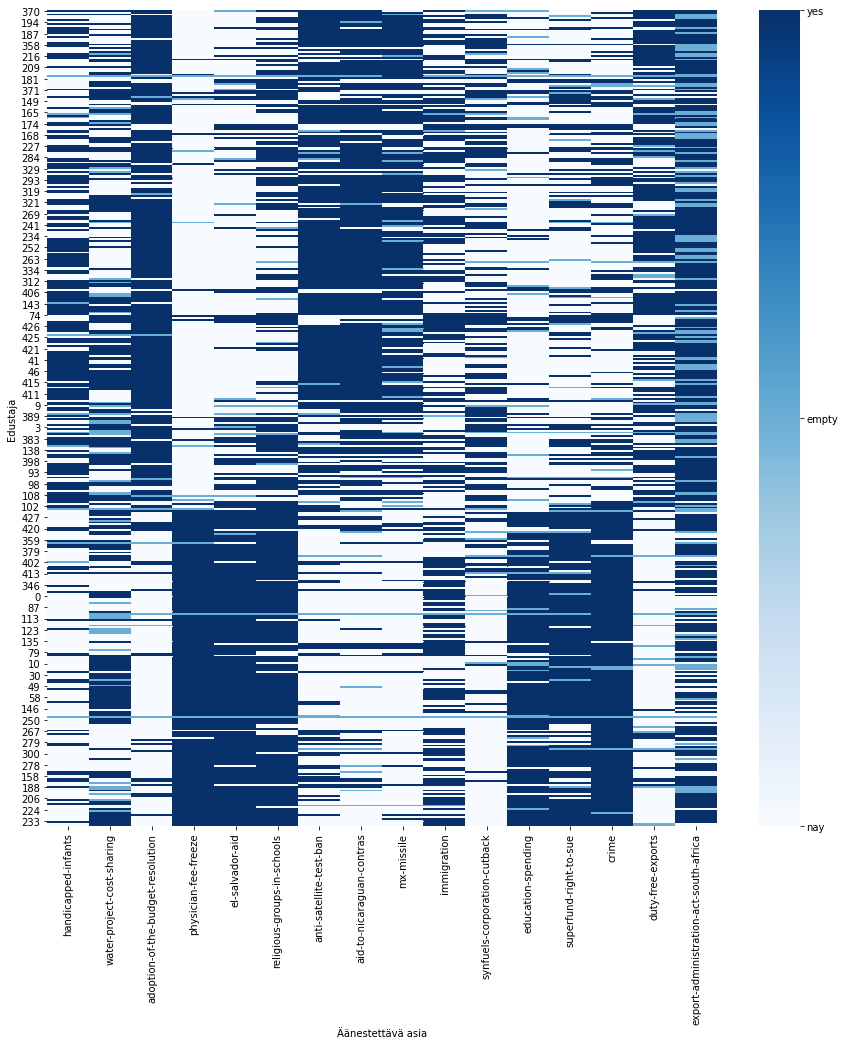

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Kirjoita toteutuksesi tähän soluun

# Järjestä rivit puolueen mukaan
df_sorted = df.sort_values(by='party')
df_sorted.drop('party', axis=1, inplace=True)


# Piirrä heatmap
fig, ax = plt.subplots(figsize=(15,15)) 
ax = sns.heatmap(df_sorted, vmin=-1, vmax=1, cmap='Blues')

cbar = ax.collections[0].colorbar
M = df_sorted.max().max()
cbar.set_ticks([-1, 0, 1])
cbar.set_ticklabels(['nay', 'empty', 'yes'])
ax.set_ylabel('Edustaja')
ax.set_xlabel('Äänestettävä asia')

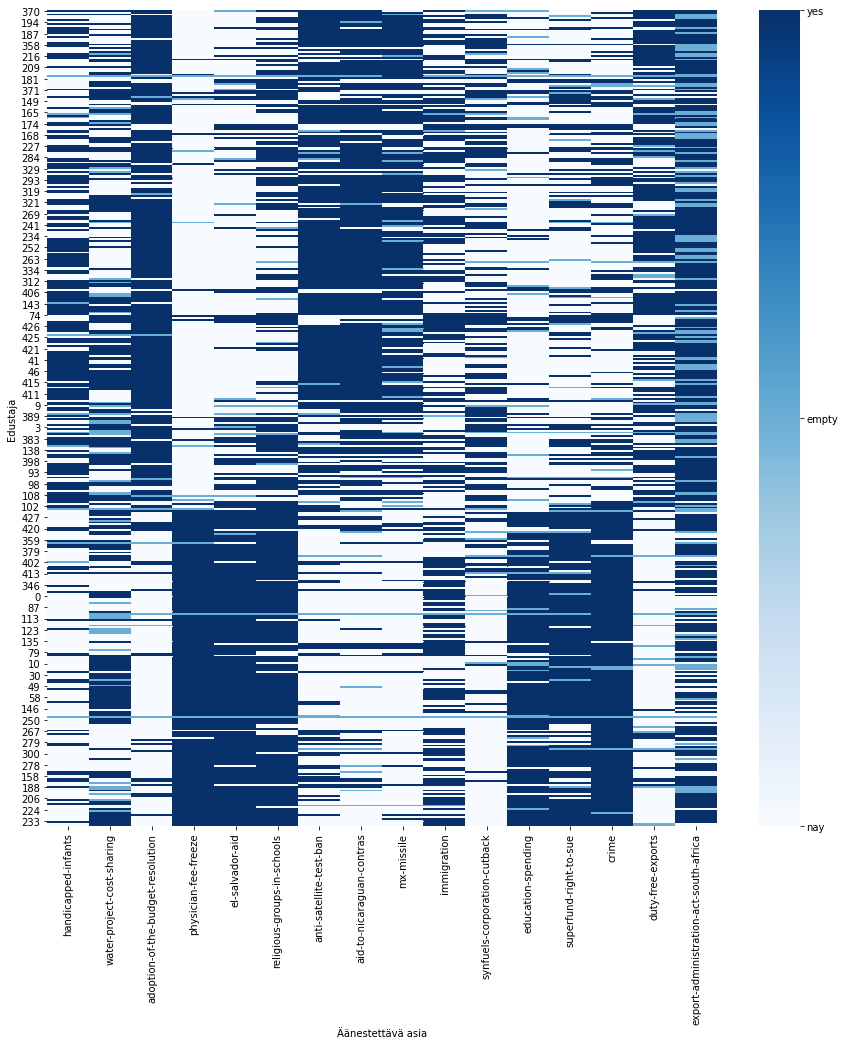

In [8]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 
# Tee vastauksesi siten, että tämän solun tuloksena näkyy alla kaaviokuva. Tallenna kuva muuttujaan ax siten, että ax.figure näyttää sen alla.
ax.figure

## Tehtävä 4

### Aihe: kNN-luokittelija

3 pistettä

Käytä scikit-learn-kirjaston [kNN-luokittelijaa](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) löytääksesi aineistosta kongressiedustaja, joka on lähinnä henkilöä, joka vastaisi y-vastauksella kaikkiin lakikysymyksiin. 

Muista pudottaa luokkamuuttuja pois.

1. Tallenna löydetystä kongressiedustajasta seuraavat tiedot: 
  * mitä puoluetta lähinnä hän on: `yes_man_party`
  * millä todennäköisyydellä: `yes_man_proba`
  
2. Tee sama myös henkilölle, joka vastaisi lakikysymyksiin seuraavasti: y,y,y,n,n,n,n,y,y,y,n,n,n,n,y,y. Tallenna vastaukset vastaaviin muuttujiin `mystery_man_proba` ja `mystery_man_party`. 

Vinkki: kun luot kaikkiin y-vastauksella vastanneen henkilön vektorin, tulee se olla lista listoista: esim. jos muuttujia olisi neljä, `[[1,1,1,1...,1]]` (muuttujiahan meillä tässä on enemmän, joten vastauksessa vektori on pidempi).

Vinkki: muista pudottaa luokkamuuttuja pois kouluttaessasi luokittelijaa.

In [9]:
# Kirjoita toteutuksesi tähän soluun. 
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


X = df.drop(['party'], 1)
y = df['party']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3, random_state=0)

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X, y)


# määritetään yes-mies
yes_values = [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]] # vastannut kaikkiin yes(1)
yes_man = neigh.kneighbors(yes_values)


# ennustetaan yes-miehen puolue
yes_man_party = neigh.predict(yes_values)


# millä todennäköisyydellä se on em. puolue
yes_man_proba = neigh.predict_proba(yes_values)


# sama myös henkilölle mystery man
example_values = [[1,1,1,0,0,0,0,1,1,1,0,0,0,0,1,1]] # vastaisi lakikysymyksiin seuraavasti: y,y,y,n,n,n,n,y,y,y,n,n,n,n,y,y
mystery_man_party = neigh.predict(example_values)
mystery_man_proba = neigh.predict_proba(example_values)

In [10]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 
# Tallenna näiden kahden kongressiedustajan tiedot mainittuihin muuttujiin.
print(yes_man_party)
print(yes_man_proba)
print(mystery_man_party)
print(mystery_man_proba)

['republican']
[[0. 1.]]
['democrat']
[[1. 0.]]
